In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
  .appName('pySpark_user_log_monitoring')\
  .config('spark.jars', 'gs://spark-lib/bigquery/spark-bigquery-latest.jar') \
  .getOrCreate()

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
table = "sirapob-bluepi-de-exam:airflow_gcs_to_bigquery.user_log_to_bigquery"

user_log_data = spark.read \
  .format("bigquery") \
  .option("table", table) \
  .option("dateFormat", "yyyy-MM-dd HH:mm:ss") \
  .load()

user_log_data.printSchema()

root
 |-- action: string (nullable = false)
 |-- created_at: timestamp (nullable = false)
 |-- id: string (nullable = false)
 |-- success: boolean (nullable = false)
 |-- updated_at: timestamp (nullable = false)
 |-- user_id: string (nullable = false)



In [5]:
user_log_data_table = user_log_data \
  .select("id", "user_id", "action", "success", "created_at", "updated_at")
  
user_log_data_table.toPandas()

,id,user_id,action,success,created_at,updated_at
0,4b796e06-3178-4133-ad30-dc505bfc13f5,55514cf0-3026-404f-8ea3-f41b00bdf6b5,login,False,2020-02-17 01:46:05.934519,2020-02-17 01:46:05.934519
1,8745cacb-f8aa-4294-b824-2d3a5c50f171,55514cf0-3026-404f-8ea3-f41b00bdf6b5,login,False,2020-02-17 01:46:06.934519,2020-02-17 01:46:06.934519
2,c12bcaa2-563c-416e-91db-36d846b0feae,55514cf0-3026-404f-8ea3-f41b00bdf6b5,change password,False,2021-03-22 02:10:15.010466,2021-03-22 02:10:15.010466
3,6cfd027d-b50b-4855-b279-91f99ce4476d,55514cf0-3026-404f-8ea3-f41b00bdf6b5,change password,True,2020-02-17 01:50:07.934519,2020-02-17 01:50:07.934519
4,c0c97762-694b-45fd-a41e-7304313eab82,55514cf0-3026-404f-8ea3-f41b00bdf6b5,login,True,2020-02-17 01:56:07.934519,2020-02-17 01:56:07.934519
5,59131a90-62c9-40d8-899e-31c3dee8ad7e,d0e73a35-ff6a-4f64-89b4-ed2b813782a3,login,True,2020-02-17 01:48:08.934519,2020-02-17 01:48:08.934519
6,5bccf37b-5d03-4c54-a76e-5eb54a3290a5,d0e73a35-ff6a-4f64-89b4-ed2b813782a3,logout,True,2020-02-17 01:52:07.934519,2020-02-17 01:52:07.934519


In [35]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

user_log = user_log_data_table.toPandas()
user_log.set_index('created_at', inplace=True)
user_log.head()

,id,user_id,action,success,updated_at
created_at,,,,,
2020-02-17 01:46:05.934519,4b796e06-3178-4133-ad30-dc505bfc13f5,55514cf0-3026-404f-8ea3-f41b00bdf6b5,login,False,2020-02-17 01:46:05.934519
2020-02-17 01:46:06.934519,8745cacb-f8aa-4294-b824-2d3a5c50f171,55514cf0-3026-404f-8ea3-f41b00bdf6b5,login,False,2020-02-17 01:46:06.934519
2021-03-22 02:10:15.010466,c12bcaa2-563c-416e-91db-36d846b0feae,55514cf0-3026-404f-8ea3-f41b00bdf6b5,change password,False,2021-03-22 02:10:15.010466
2020-02-17 01:50:07.934519,6cfd027d-b50b-4855-b279-91f99ce4476d,55514cf0-3026-404f-8ea3-f41b00bdf6b5,change password,True,2020-02-17 01:50:07.934519
2020-02-17 01:56:07.934519,c0c97762-694b-45fd-a41e-7304313eab82,55514cf0-3026-404f-8ea3-f41b00bdf6b5,login,True,2020-02-17 01:56:07.934519


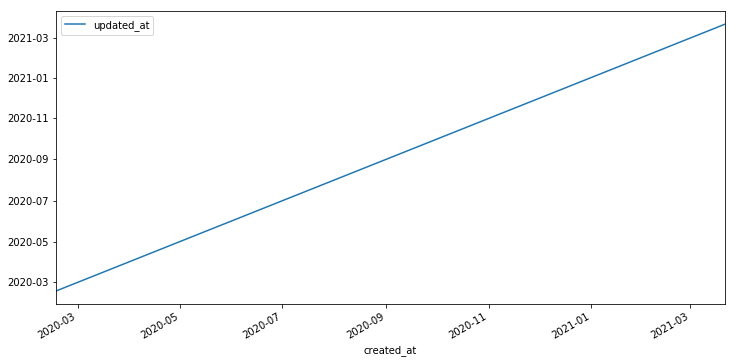

In [36]:
user_log.plot(kind='line',figsize=(12,6))